# Data Loading 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [30]:

df = pd.read_csv(r"../data/bodyfat.csv")
df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [195]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# Visualization 


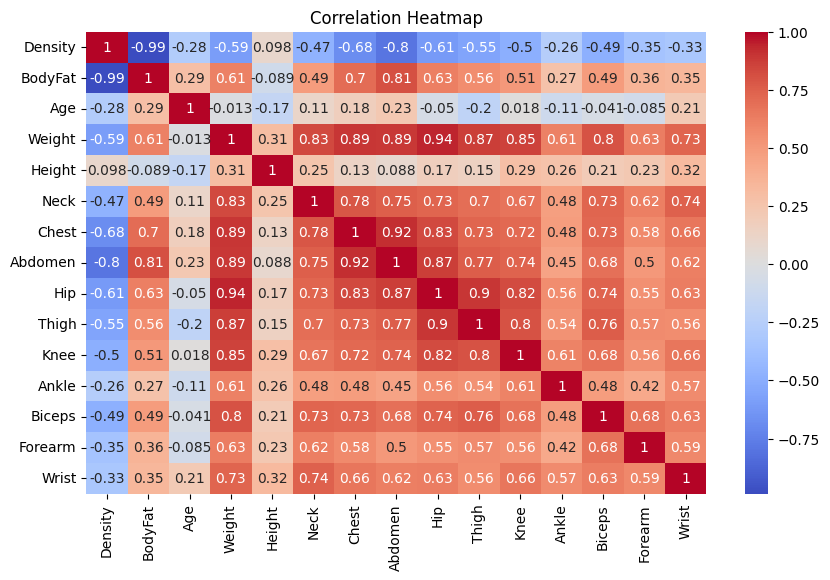

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


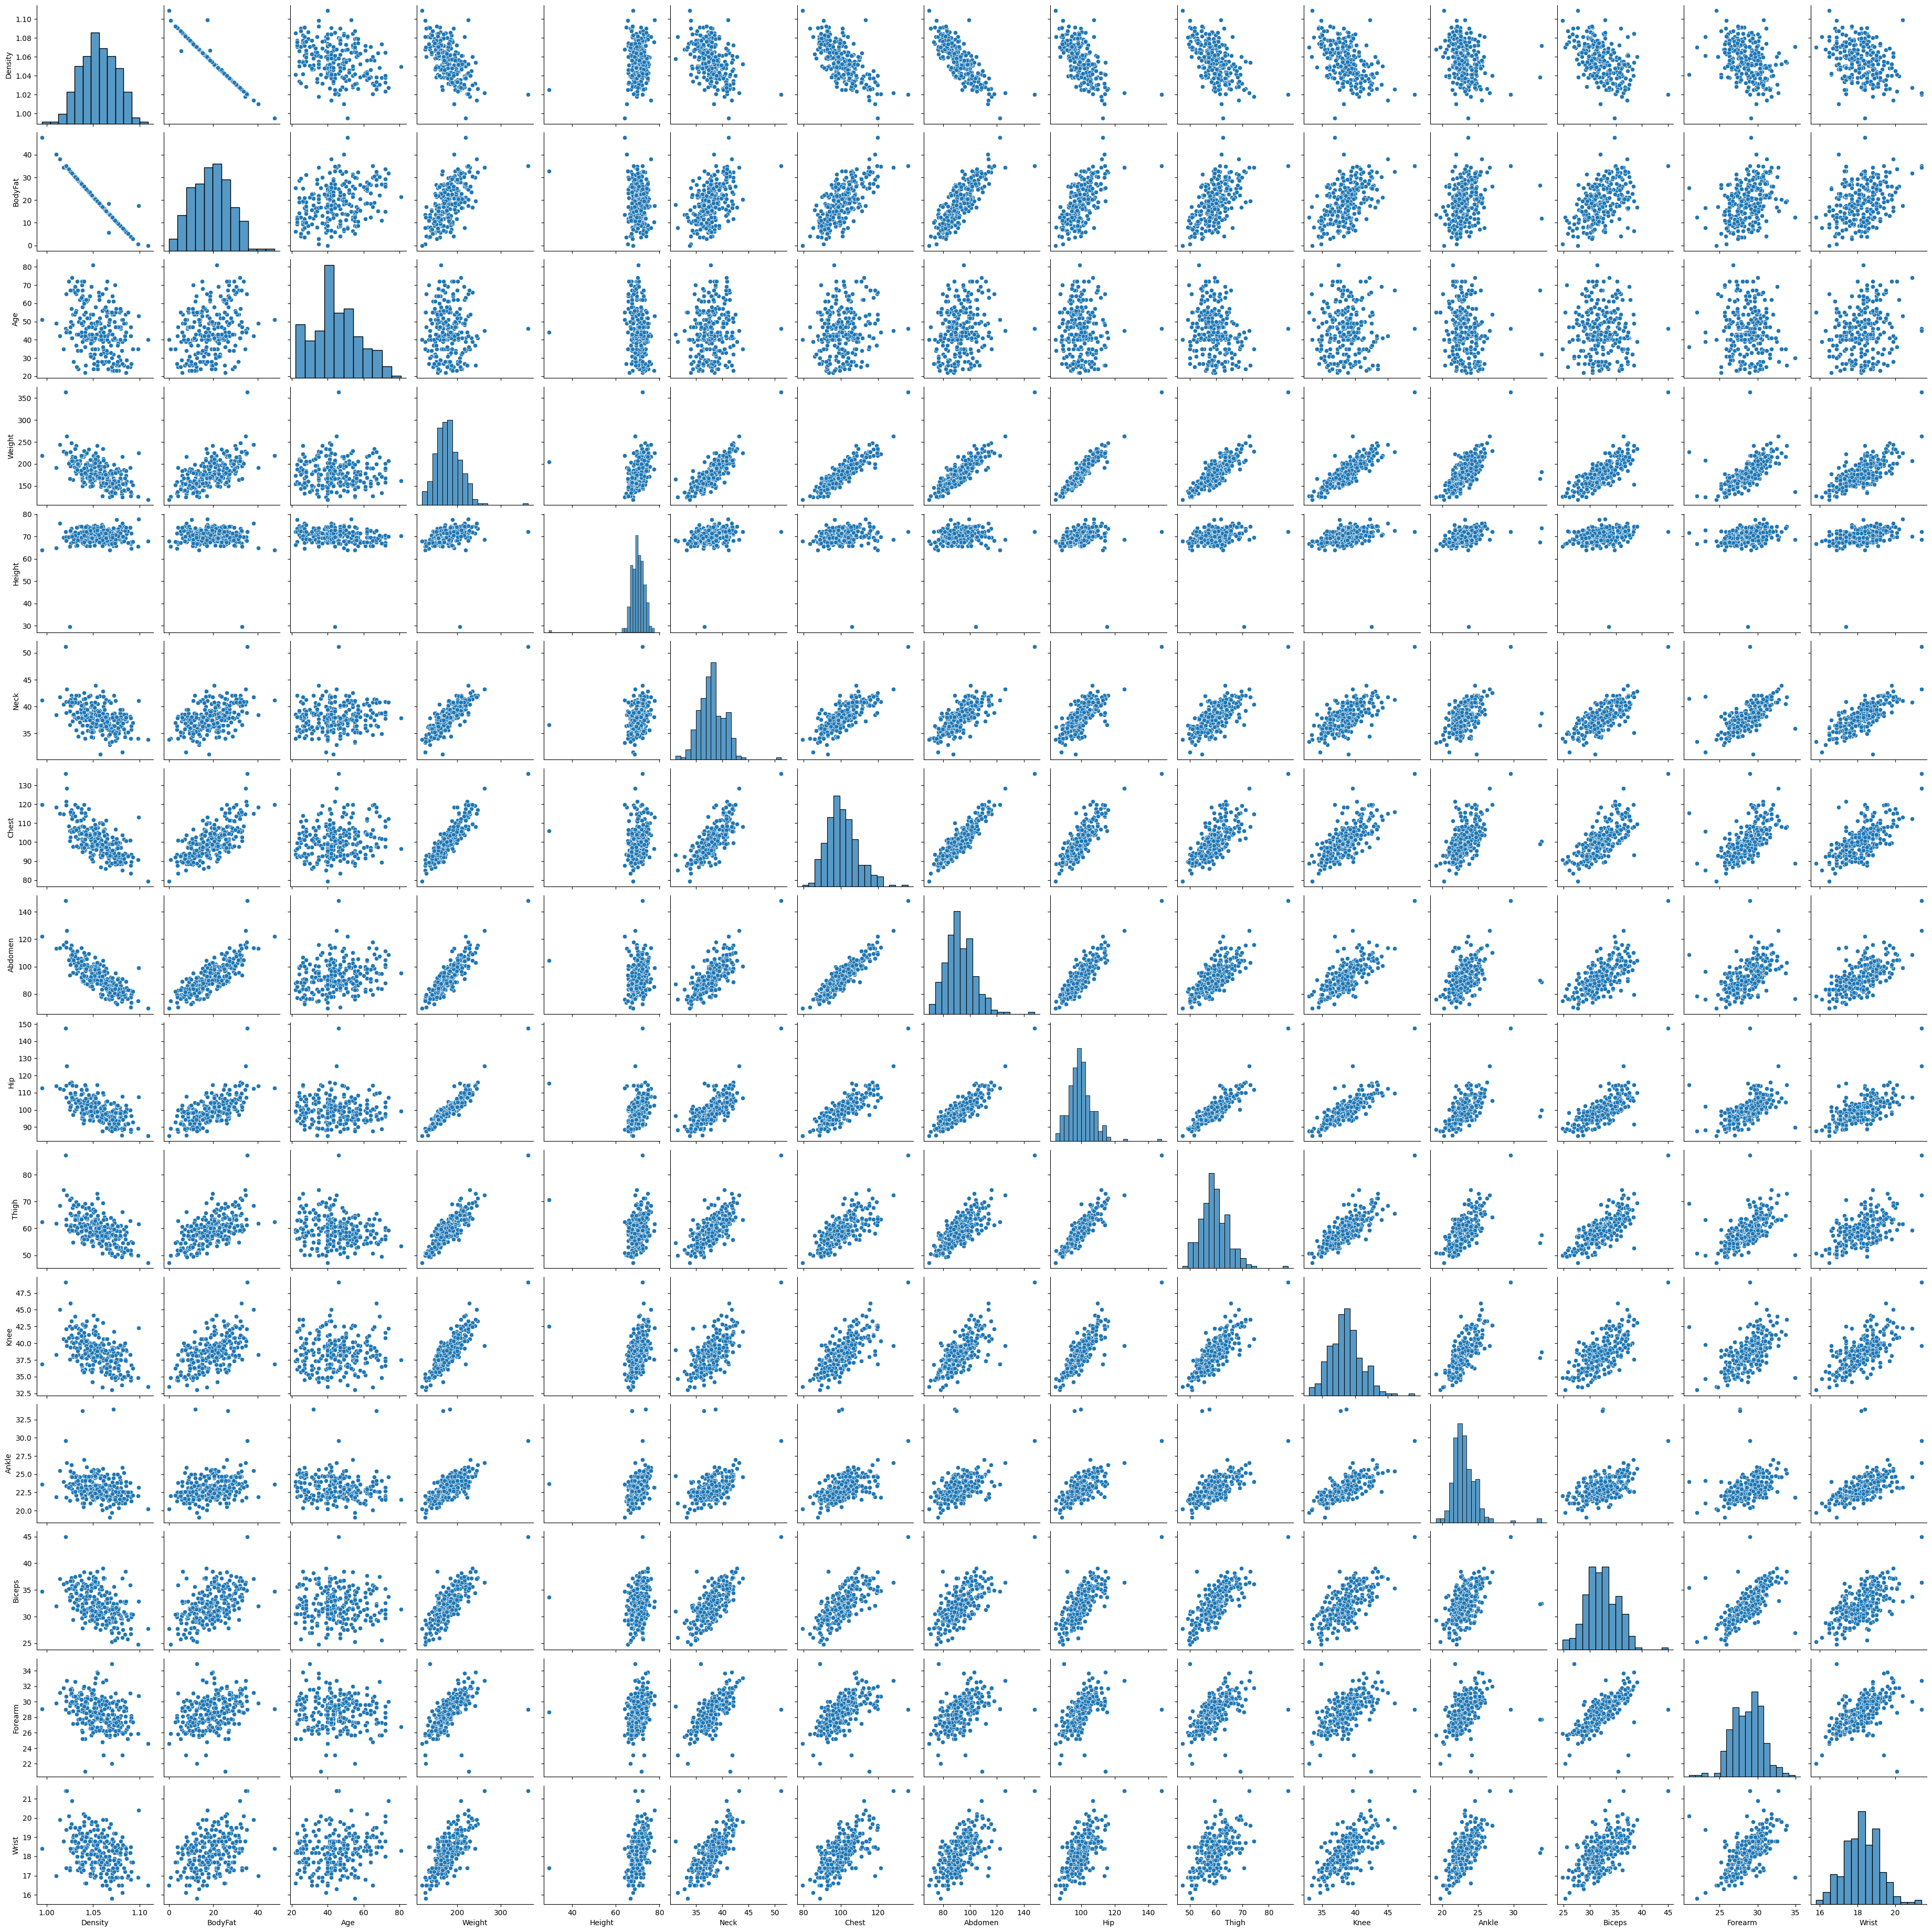

In [197]:
sns.pairplot(df)
plt.show()


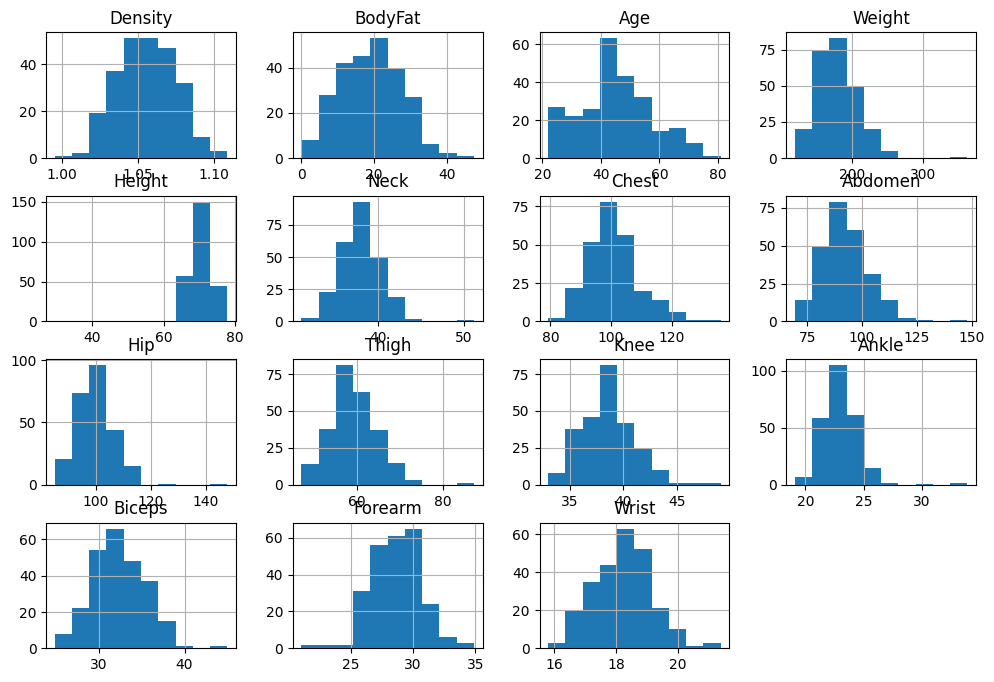

In [198]:
df.hist(figsize=(12, 8))
plt.show()


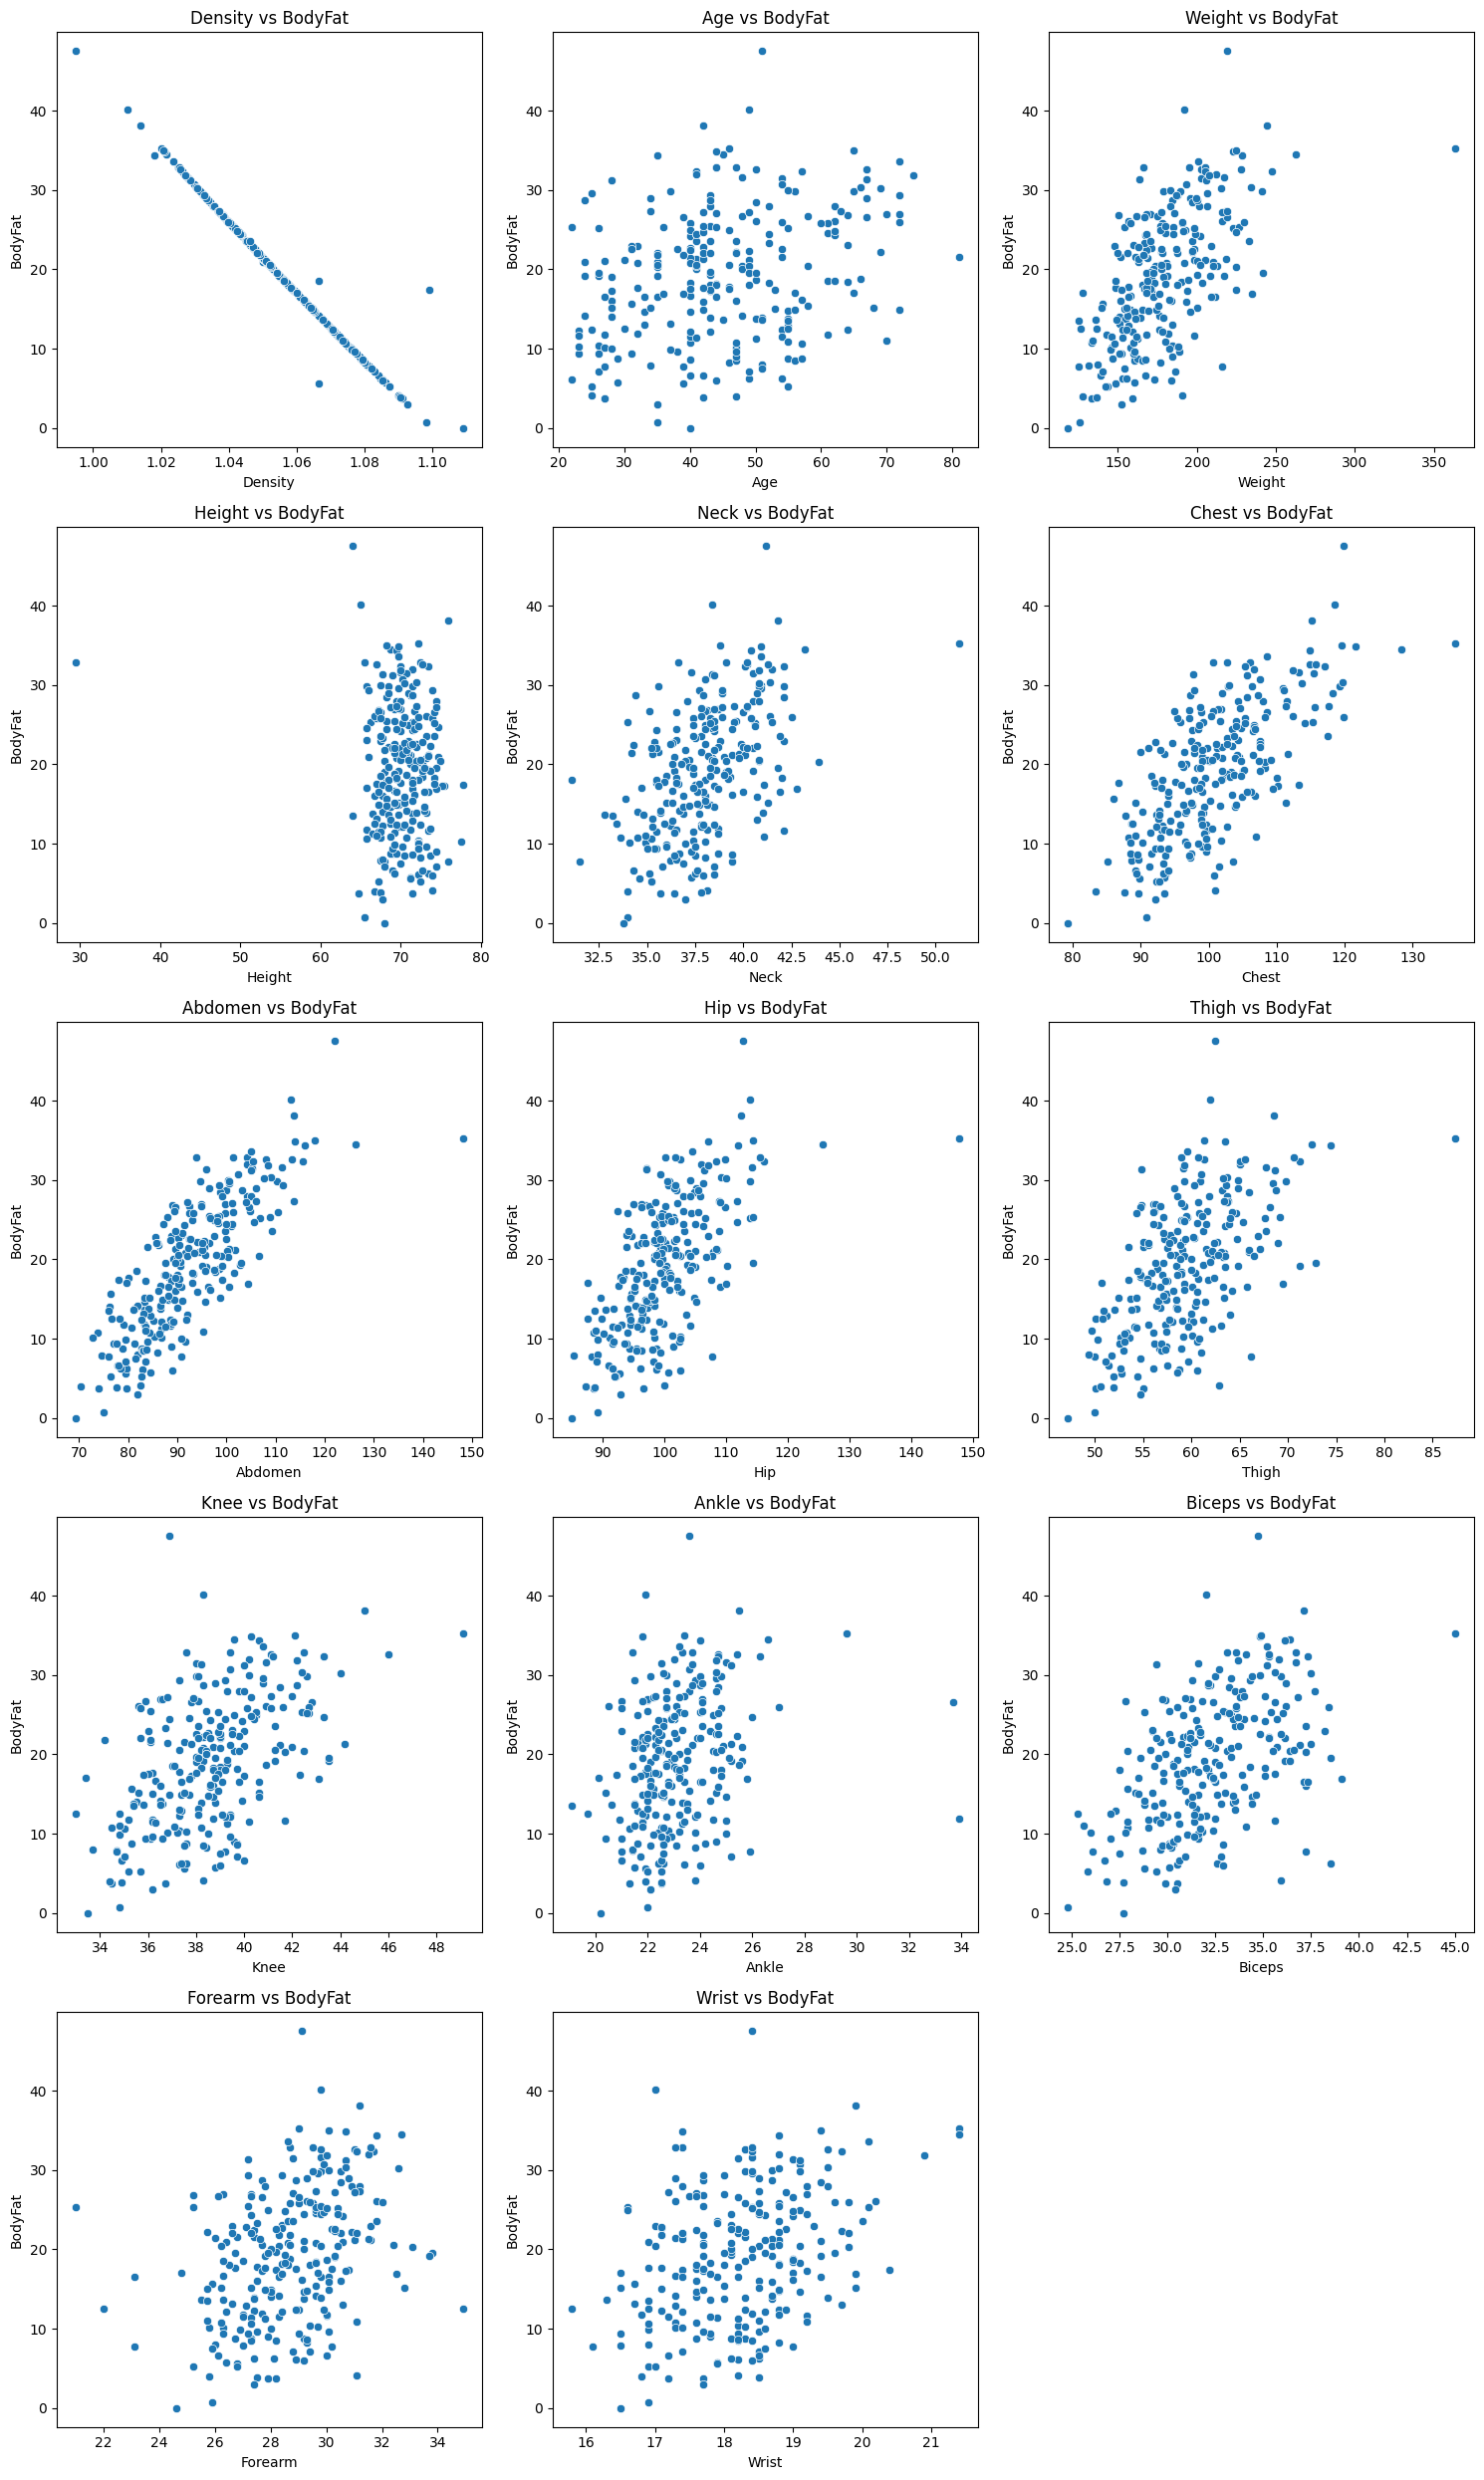

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

target = "BodyFat"   # your dependent variable

# Create a list of independent variable names
independent_vars = [col for col in df.columns if col != target]

# Number of plots
n = len(independent_vars)

# Set up grid size (3 columns)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(independent_vars):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


## Data Preprocessing 

In [200]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [20]:
df[['Density', 'BodyFat']].head()

,Density,BodyFat
0,1.0708,12.3
1,1.0853,6.1
2,1.0414,25.3
3,1.0751,10.4
4,1.0340,28.7


In [16]:
print((df['Density'] == df['BodyFat']).sum())

0


(0.0, 50.0)

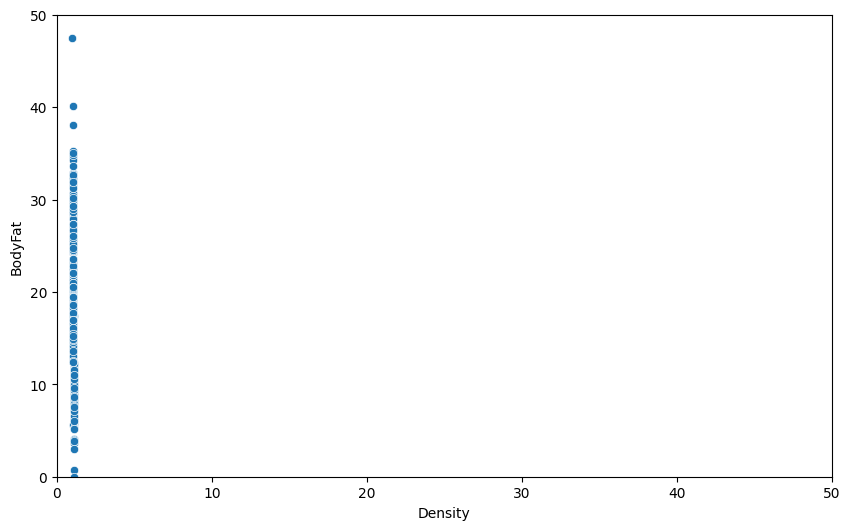

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Density'], y=df['BodyFat'])
plt.xlim(0, 50)
plt.ylim(0, 50)

In [18]:
print((df['Density'] == df['Weight'] / (df['Height'] ** 3)).sum())

0


In [201]:
df = df.dropna()

In [202]:
# Remove outliers using z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

In [48]:
X = df.drop(['BodyFat', 'Density'], axis=1)
y = df['BodyFat']
X, y

(     Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
 0     23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
 1     22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
 2     22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
 3     26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   22.8   
 4     24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   24.0   
 ..   ...     ...     ...   ...    ...      ...    ...    ...   ...    ...   
 247   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   21.5   
 248   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   23.2   
 249   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   21.5   
 250   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   22.7   
 251   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   24.6   
 
      Biceps  Forearm  Wrist  
 0      32.0     27.4   17.1  


# Training Stage

## Splitting the dataset into the Training set and Test set

Desity is redundant here. Please remove it.

The reason is that ``density`` is already represented by weight and height, so including it would introduce ``multicollinearity`` into the model.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
len(X), len(X_train), len(X_test)

(252, 201, 51)

In [51]:
len(y), len(y_train), len(y_test)

(252, 201, 51)

In [52]:
# ------------------- Multiple Linear Regression Model -------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [53]:
# Train model
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [54]:
# Predictions
y_pred = pipeline.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")   
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 17.979968994818186
Root Mean Squared Error: 4.240279353393852
Mean Absolute Error: 3.329253769598869
R-squared: 0.6134842007585357


# Visualizations After Training

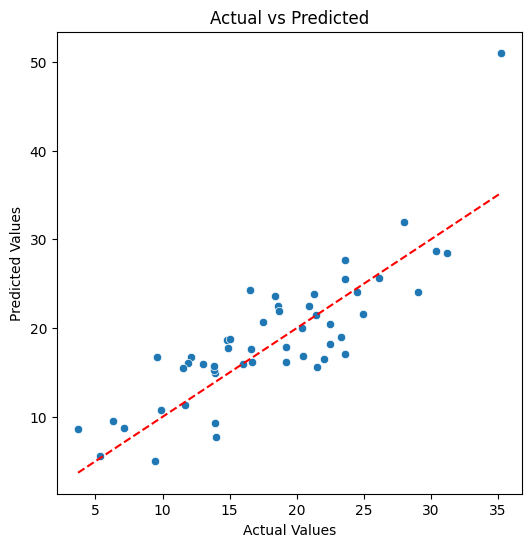

In [56]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


## Residual Plot

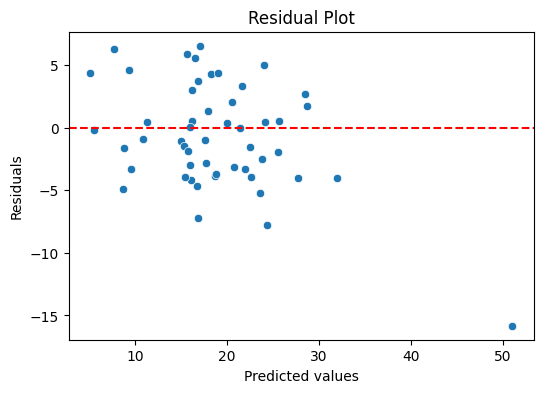

In [57]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Distribution of Residuals (Check normality)

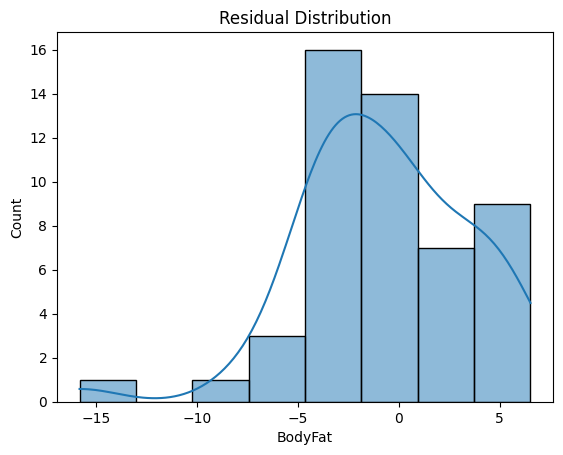

In [58]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [59]:
import statsmodels.api as sm

X_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_const).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     45.35
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           9.90e-51
Time:                        00:46:06   Log-Likelihood:                -576.36
No. Observations:                 201   AIC:                             1181.
Df Residuals:                     187   BIC:                             1227.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.2798     19.181     -0.744      0.4

# Export Model 

In [62]:
import joblib
import os

import joblib
# Save models into 'models' folder
joblib.dump(pipeline, "../models/bodyfat_model_02.pkl")
print("Models exported successfully!")

Models exported successfully!
